# Prediksi Harga Kripto Ethereum
## Kelompok 4
* Kevin Valerian Ninia
* Brylian Fandhi Safsalta

## DAFTAR ISI
    
### 1. DESKRIPSI MASALAH
    
### 2. METADATA
    
### 3. DATA UNDERSTANDING
    
### 4. DATA PREPARATION
    
### 5. DATA MODELING
* Regresi Linear Sederhana
* Regresi Linear Berganda
* Recurrent Neural Network (RNN)
* Long Short Term Memory (LSTM)

### 6. EVALUASI DAN PEMILIHAN MODEL TERBAIK  



# Deskripsi Masalah
---
Membuat sebuah model yang dapat menentukan prediksi harga tertinggi koin kripto Ethereum pada hari tersebut. Sehingga, kita dapat mengambil keputusan untuk membeli atau menjual koin kripto tersebut saat ini demi mendapatkan keuntungan yang maksimal dan meminimalisir kerugian.

<a id="2"></a>
# <p style="font-family:ARIAL;color:#1C2842;font-size:100%;" >Metadata</p>
---
Dataset Data Historis Ethereum - Investing.com.csv
* 1. Tanggal    --> Catatan waktu yang dimuat dalam format tanggal/bulan/tahun
* 2. Terakhir   --> Harga terakhir koin ethereum pada tanggal tersebut
* 3. Pembukaan  --> Harga awal koin ethereum pada tanggal tersebut
* 4. Tertinggi  --> Harga tertinggi yang diberikan untuk koin ethereum pada tanggal tersebut
* 5. Terendah   --> Harga terendah yang diberikan untuk koin ethereum pada tanggal tersebut
* 6. Vol.       --> Banyaknya orang yang sedang memiliki koin ethereum ppada tanggal tersebut
* 7. Perubahan% --> Presentasi perubahan dari harga Pembukaan dengan harga Terakhir


# Data Understanding
---

In [2]:
#Import Library
# import library pandas
import pandas as pd

# import library numpy
import numpy as np

# import library matplotlib
import matplotlib.pyplot as plt

# import library seaborn
import seaborn as sns

# me non aktifkan peringatan pada python dengan import warning -> 'ignore'
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Memuat dataset
df =  pd.read_csv('Data Historis Ethereum.csv')
#Memanggil serta menampilkan 10 data teratas dari dataset tersebut
df.head(10)

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,02/12/2021,"4.569,60","4.583,28","4.629,75","4.454,79","617,22K","-0,30%"
1,01/12/2021,"4.583,28","4.628,72","4.778,14","4.525,33","669,18K","-0,99%"
2,30/11/2021,"4.628,90","4.443,22","4.749,12","4.349,21","973,46K","4,18%"
3,29/11/2021,"4.443,22","4.296,98","4.456,82","4.280,18","532,66K","3,40%"
4,28/11/2021,"4.296,98","4.095,16","4.297,63","3.980,24","487,53K","4,94%"
5,27/11/2021,"4.094,80","4.037,06","4.183,02","4.029,06","370,73K","1,49%"
6,26/11/2021,"4.034,53","4.520,30","4.548,10","3.917,43","1,00M","-10,75%"
7,25/11/2021,"4.520,30","4.270,73","4.549,74","4.248,90","578,65K","5,77%"
8,24/11/2021,"4.273,54","4.340,23","4.372,83","4.172,19","595,96K","-1,54%"
9,23/11/2021,"4.340,23","4.086,73","4.384,75","4.064,17","684,35K","6,20%"


In [4]:
#Melihat detail informasi terkain kolom yang ada dalam dataset tersebut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tanggal     2094 non-null   object
 1   Terakhir    2094 non-null   object
 2   Pembukaan   2094 non-null   object
 3   Tertinggi   2094 non-null   object
 4   Terendah    2094 non-null   object
 5   Vol.        2094 non-null   object
 6   Perubahan%  2094 non-null   object
dtypes: object(7)
memory usage: 114.6+ KB


Bentuk tipe data dari masing-masing atribut yang ada dalam dataset tersebut adalah bertipe object semuanya

In [5]:
#Melihat dimensi dataset
df.shape

(2094, 7)

Dataset tersebut memiliki 2094 baris data dengan 7 kolom

In [6]:
#Melakukan pengecekan missing values terhadap dataset
print('Jumlah dataset yang ada pada masing-masing atribut:')
df.isna().sum()

Jumlah dataset yang ada pada masing-masing atribut:


Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64

Tidak terdapat missing values dalam dataset tersebut

In [7]:
#Melihat deskripsi dataset secara statistik
df.describe()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
count,2094,2094,2094,2094,2094,2094,2094
unique,2094,1983,1974,1976,1967,1648,1213
top,02/12/2021,"10,16","10,16","10,16","10,16",-,"0,00%"
freq,1,9,8,7,7,8,14


Karena dataset tersebut memiliki kolom dengan tipe data object semuanya maka tidak dapat ditambilkan perhitungannya secara statistik. Sehingga pada tahap berikutnya yaitu Data Preparation perlu dilakukan perubahaan tipe data menjadi numerik untuk  6 kolom lainnya kecuali kolom Tanggal perlu diubah menjadi tipe Date agar dapat dilakukan pengolahan lebih lanjut


# Data Preparation
---

In [8]:
#Memanggil kembali dataset
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,02/12/2021,"4.569,60","4.583,28","4.629,75","4.454,79","617,22K","-0,30%"
1,01/12/2021,"4.583,28","4.628,72","4.778,14","4.525,33","669,18K","-0,99%"
2,30/11/2021,"4.628,90","4.443,22","4.749,12","4.349,21","973,46K","4,18%"
3,29/11/2021,"4.443,22","4.296,98","4.456,82","4.280,18","532,66K","3,40%"
4,28/11/2021,"4.296,98","4.095,16","4.297,63","3.980,24","487,53K","4,94%"
...,...,...,...,...,...,...,...
2089,14/03/2016,"12,50","15,07","15,07","11,40","92,18K","-17,05%"
2090,13/03/2016,"15,07","12,92","15,07","12,92","1,30K","16,64%"
2091,12/03/2016,"12,92","11,95","13,45","11,95","0,83K","8,12%"
2092,11/03/2016,"11,95","11,75","11,95","11,75","0,18K","1,70%"


In [9]:
#Melakukan perubahan terhadap format bilangan dalam dataset dengan menghilangkan tanda titik (.) sebagai ribuan
df['Terakhir'] = df['Terakhir'].str.replace('.', '')
df['Pembukaan'] = df['Pembukaan'].str.replace('.', '')
df['Tertinggi'] = df['Tertinggi'].str.replace('.', '')
df['Terendah'] = df['Terendah'].str.replace('.', '')
df['Vol.'] = df['Vol.'].str.replace(',', '')
df['Vol.'] = df['Vol.'].str.replace('K', '0')
df['Vol.'] = df['Vol.'].str.replace('M', '0000')
df['Perubahan%'] = df['Perubahan%'].str.replace('%', '')

In [10]:
#Menampilkan kembali dataset setelah dilakukan perubahan format bilangan dengan menghilangkan tanda titik
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,02/12/2021,"4569,60","4583,28","4629,75","4454,79",617220,"-0,30"
1,01/12/2021,"4583,28","4628,72","4778,14","4525,33",669180,"-0,99"
2,30/11/2021,"4628,90","4443,22","4749,12","4349,21",973460,"4,18"
3,29/11/2021,"4443,22","4296,98","4456,82","4280,18",532660,"3,40"
4,28/11/2021,"4296,98","4095,16","4297,63","3980,24",487530,"4,94"
...,...,...,...,...,...,...,...
2089,14/03/2016,"12,50","15,07","15,07","11,40",92180,"-17,05"
2090,13/03/2016,"15,07","12,92","15,07","12,92",1300,"16,64"
2091,12/03/2016,"12,92","11,95","13,45","11,95",0830,"8,12"
2092,11/03/2016,"11,95","11,75","11,95","11,75",0180,"1,70"


In [11]:
#Melakukan perubahan terhadap format bilangan dalam dataset dengan mengganti tanda koma (,) menjadi tanda (.) supaya dapat merubah tipe data menjadi float
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format = "%d/%m/%Y")
df['Terakhir'] = df['Terakhir'].str.replace(',', '.').astype(float)
df['Pembukaan'] = df['Pembukaan'].str.replace(',', '.').astype(float)
df['Tertinggi'] = df['Tertinggi'].str.replace(',', '.').astype(float)
df['Terendah'] = df['Terendah'].str.replace(',', '.').astype(float)
df['Vol.']= pd.to_numeric(df['Vol.'], errors='coerce')
df['Perubahan%'] = df['Perubahan%'].str.replace(',', '.').astype(float)

In [12]:
#Menampilkan kembali dataset setelah dilakukan semua perubahan format bilangan beserta tipe data menjadi float
df.head(5)

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2021-12-02,4569.60,4583.28,4629.75,4454.79,617220.0,-0.30
1,2021-12-01,4583.28,4628.72,4778.14,4525.33,669180.0,-0.99
2,2021-11-30,4628.90,4443.22,4749.12,4349.21,973460.0,4.18
3,2021-11-29,4443.22,4296.98,4456.82,4280.18,532660.0,3.40
4,2021-11-28,4296.98,4095.16,4297.63,3980.24,487530.0,4.94


In [13]:
#Membuat data pada atribut Perubahan% dalam bentuk format desimal tanpa tanda % dengan mengalikannya dengan 0.01
df['Perubahan%'] = df['Perubahan%'] * 0.01

In [14]:
df.head(5)

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2021-12-02,4569.60,4583.28,4629.75,4454.79,617220.0,-0.0030
1,2021-12-01,4583.28,4628.72,4778.14,4525.33,669180.0,-0.0099
2,2021-11-30,4628.90,4443.22,4749.12,4349.21,973460.0,0.0418
3,2021-11-29,4443.22,4296.98,4456.82,4280.18,532660.0,0.0340
4,2021-11-28,4296.98,4095.16,4297.63,3980.24,487530.0,0.0494


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     2094 non-null   datetime64[ns]
 1   Terakhir    2094 non-null   float64       
 2   Pembukaan   2094 non-null   float64       
 3   Tertinggi   2094 non-null   float64       
 4   Terendah    2094 non-null   float64       
 5   Vol.        2086 non-null   float64       
 6   Perubahan%  2094 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 114.6 KB


In [16]:
#Melakukan pengecekan missing values terhadap dataset setelah dilakukan perubaha format dan tipe data terhadap dataset
print('Jumlah dataset yang ada pada masing-masing atribut:')
df.isna().sum()

Jumlah dataset yang ada pada masing-masing atribut:


Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          8
Perubahan%    0
dtype: int64

In [17]:
#Melihat baris data yang missing value pada kolom Vol.
mv_Vol = df.loc[np.where(df['Vol.'].isna())]
mv_Vol

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
1467,2017-11-26,464.00,464.00,464.00,464.00,NaN,0.0
1941,2016-08-09,10.16,10.16,10.16,10.16,NaN,0.0
1942,2016-08-08,10.16,10.16,10.16,10.16,NaN,0.0
1943,2016-08-07,10.16,10.16,10.16,10.16,NaN,0.0
1944,2016-08-06,10.16,10.16,10.16,10.16,NaN,0.0
1945,2016-08-05,10.16,10.16,10.16,10.16,NaN,0.0
1946,2016-08-04,10.16,10.16,10.16,10.16,NaN,0.0
1947,2016-08-03,10.16,10.16,10.16,10.16,NaN,0.0


Dari Data Frame diatas yang menunjukan isi dari baris data yang mengandung missing value terhadap atribut Vol. menunjukkan bahwa ada kejanggalan terhadap data. Yang mana tidak ada pergerakan data dari tanggal 3 Agustus 2016 s/d 9 Agustus 2016 dan pada tanggal 26 November 2017. Karena pola data dari 8 baris tersebut yang janggal, kami sepakat untuk tidak memuatnya kedalam dataset. Selanjutnya perlu dilakukan penghapusan 8 baris data missing value tersebut

In [18]:
#Menghapus data missing value dari dataset
df = df.dropna()
df

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,2021-12-02,4569.60,4583.28,4629.75,4454.79,617220.0,-0.0030
1,2021-12-01,4583.28,4628.72,4778.14,4525.33,669180.0,-0.0099
2,2021-11-30,4628.90,4443.22,4749.12,4349.21,973460.0,0.0418
3,2021-11-29,4443.22,4296.98,4456.82,4280.18,532660.0,0.0340
4,2021-11-28,4296.98,4095.16,4297.63,3980.24,487530.0,0.0494
...,...,...,...,...,...,...,...
2089,2016-03-14,12.50,15.07,15.07,11.40,92180.0,-0.1705
2090,2016-03-13,15.07,12.92,15.07,12.92,1300.0,0.1664
2091,2016-03-12,12.92,11.95,13.45,11.95,830.0,0.0812
2092,2016-03-11,11.95,11.75,11.95,11.75,180.0,0.0170


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2093
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     2086 non-null   datetime64[ns]
 1   Terakhir    2086 non-null   float64       
 2   Pembukaan   2086 non-null   float64       
 3   Tertinggi   2086 non-null   float64       
 4   Terendah    2086 non-null   float64       
 5   Vol.        2086 non-null   float64       
 6   Perubahan%  2086 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 130.4 KB


In [20]:
df.tail()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
2089,2016-03-14,12.50,15.07,15.07,11.40,92180.0,-0.1705
2090,2016-03-13,15.07,12.92,15.07,12.92,1300.0,0.1664
2091,2016-03-12,12.92,11.95,13.45,11.95,830.0,0.0812
2092,2016-03-11,11.95,11.75,11.95,11.75,180.0,0.0170
2093,2016-03-10,11.75,11.20,11.85,11.07,0.0,0.0491


In [21]:
#Melakukan pengecekan missing values terhadap dataset setelah dilakukan penanganan
print('Jumlah dataset yang ada pada masing-masing atribut:')
df.isna().sum()

Jumlah dataset yang ada pada masing-masing atribut:


Tanggal       0
Terakhir      0
Pembukaan     0
Tertinggi     0
Terendah      0
Vol.          0
Perubahan%    0
dtype: int64

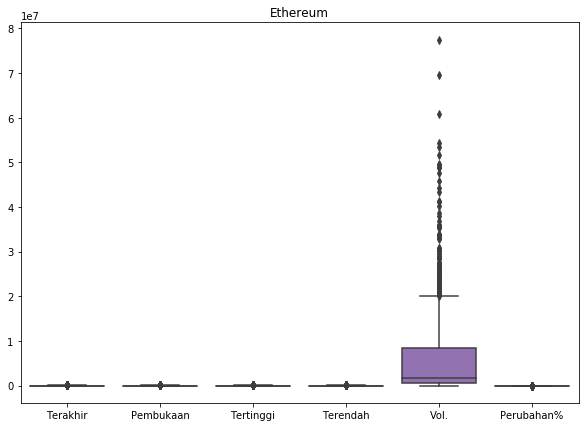

In [22]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=df).set_title("Ethereum")
plt.show()

Berdasarkan visualisasi boxplot diatas, dapat diketahui bahwa atribut Vol. memiliki data outlier yang banyak. Hal ini disebabkan karena pergerakan Crypto currency yang fluktuatif, sehingga pola data dalam atribut Vol. dapat membentuk Outlier

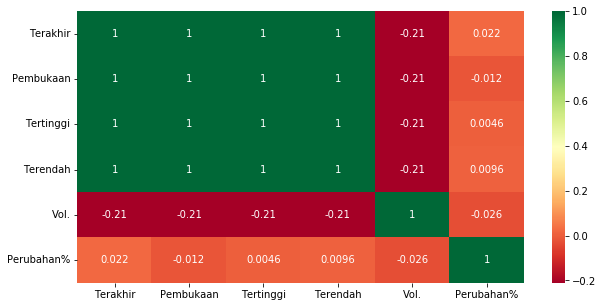

In [23]:
# mendapatkan korelasi di setiap fitur dalam dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))

# plot heatmap
h = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

* Berdasarkan visualisasi dari heatmap korelasi dataset, diperoleh bahwa atribut Vol. merupakan atribut dengan korelasi paling lemah relasinya terhadap atribut Terakhir, Pembukaan, Tertinggi, dan Terendah dengan nilai korelasi = -0.21 kemudian diikuti oleh atribut Perubahan% dengan  nilai korelasi = -0.026.

* Atribut Perubahan% juga merupakan atribut dengan korelasi yang cukup lemah terhadap 5 atribut lainnya.

* Sedangkan atribut Terakhir, Pembukaan, Tertinggi, dan Terendah keempatnya memiliki korelasi yang kuat terhadap satu sama lainnya. Sehingga, dapat disimpulkan bahwa untuk membangun model prediksi nantinya atribut yang direkomendasikan adalah 

* --> Pembukaan
* --> Tertinggi
* --> Terendah
* --> Terakhir

In [24]:
#Melihat rata-rata harga
tahun = df['Tanggal']
harga_tinggi = df['Tertinggi']

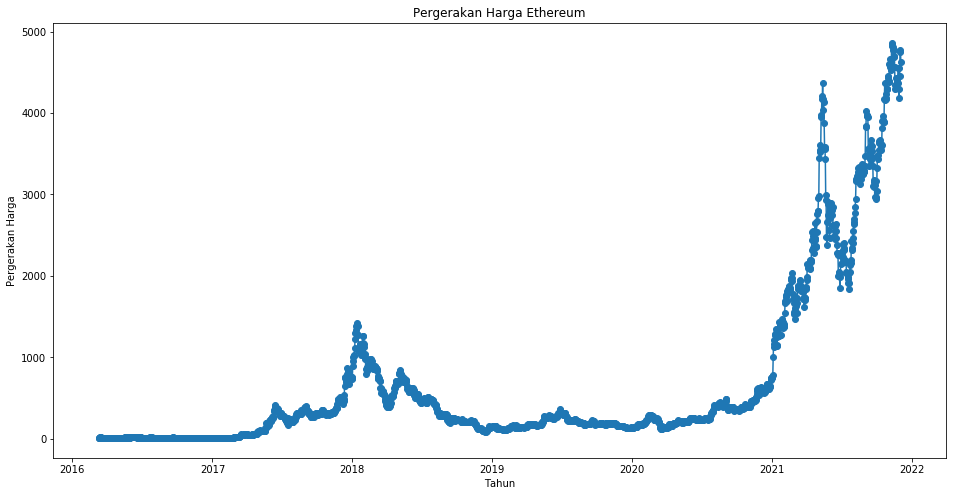

In [25]:
plt.figure(figsize=(16,8))
plt.scatter(tahun,harga_tinggi)
plt.plot(tahun,harga_tinggi)
plt.xlabel('Tahun')
plt.ylabel('Pergerakan Harga')
plt.title('Pergerakan Harga Ethereum')
plt.show()


# Data Modeling
---

In [26]:
#Import library untuk melakukan skoring 
from sklearn import metrics  
from sklearn.metrics import mean_absolute_error

In [27]:
# import Module train_test_split digunakan untuk membagi data kita menjadi training dan testing set.
from sklearn.model_selection import train_test_split

In [28]:
# Prepare data
# Pertama, buat variabel x dan y.
x = df['Pembukaan'].values.reshape(-1,1)
y = df['Tertinggi'].values.reshape(-1,1)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

* X_train: Untuk menampung data source yang akan dilatih.
* X_test: Untuk menampung data target yang akan dilatih.
* y_train: Untuk menampung data source yang akan digunakan untuk testing.
* y_test: Untuk menampung data target yang akan digunakan untuk testing.

X dan y adalah nama variabel yang digunakan saat mendefinisikan data source dan data target. Parameter *test_size* digunakan untuk mendefinisikan ukuran data testing. Pembagian dataset di atas, test_size=0.3 berarti data yang digunakan sebagai data testing adalah sebesar 30% dari keseluruhan dataset.

Perlu diketahui bahwa metode ini akan membagi train set dan test set secara random atau acak. Jadi, jika kita mengulang proses running, maka tentunya hasil yang didapat akan berubah-ubah. Untuk mengatasinya, kami menggunakan parameter *random_state*


# --- Build Model --- Regresi Linear Sederhana

In [30]:
#Import library LinearRegression
from sklearn.linear_model import LinearRegression

#Import library math
import math

In [31]:
#Definisi variabel object LinerRegression
regressor = LinearRegression()

In [32]:
#Training the model menggunakan training data yang sudah displit sebelumnya.
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
#MElihat nilai koefisien (m) dan intercept (b)
print('Nilai Koefisien : ', regressor.coef_.item())
print('Nilai Intercept : ', regressor.intercept_.item())

Nilai Koefisien :  1.036341074413246
Nilai Intercept :  2.108953147465286


Dari nilai m dan b diatas, kalau dimasukan ke dalam rumus persamaan menjadi:
#     **y = 1.03x + 2.10**

In [34]:
#Cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit sebelumnya. Dan nilai korelasinya
regressor.score(X_test,y_test)

0.9986633171237879

Model kita mendapatkan accuracy score sebesar 99.87%

In [35]:
print('Correlation: ', math.sqrt(regressor.score(X_test,y_test)))

Correlation:  0.9993314350723627


Text(0.5, 1.0, 'Plot Pembukaan vs Tertinggi')

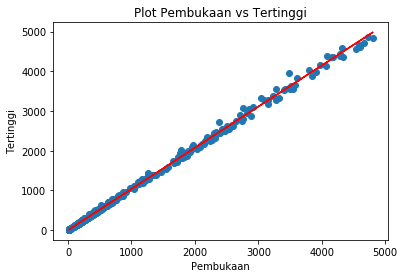

In [36]:
y_prediksi = regressor.predict(X_test)

plt.scatter(X_test,y_test)
plt.plot(X_test, y_prediksi, c='r')
plt.xlabel('Pembukaan')
plt.ylabel('Tertinggi')
plt.title('Plot Pembukaan vs Tertinggi')

Garis merah merupakan Regression Line dari model yang telah dibuat sebelumnya.

In [37]:
np_table = np.concatenate((X_test,y_test,y_prediksi), axis=1)
new_dataframe = pd.DataFrame(data=np_table, columns=['X_test','y_test','y_predict'])

In [38]:
new_dataframe

,X_test,y_test,y_predict
0,697.06,713.80,724.500862
1,353.06,353.61,367.999533
2,11.69,11.76,14.223780
3,164.39,173.96,172.473062
4,448.73,465.09,467.146283
...,...,...,...
621,855.91,867.35,889.123642
622,2035.09,2042.61,2111.156310
623,257.00,299.89,268.448609
624,11.28,11.50,13.798880


In [39]:
#Perhitungan skor hasil pemodelan
# Regression metrics
explained_variance=metrics.explained_variance_score(y_test, y_prediksi)
mae_lrsederhana=metrics.mean_absolute_error(y_test, y_prediksi) 
mse_lrsederhana=metrics.mean_squared_error(y_test, y_prediksi) 
mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_prediksi)
median_absolute_error=metrics.median_absolute_error(y_test, y_prediksi)
r2_lrsederhana=metrics.r2_score(y_test, y_prediksi)
reg_score=regressor.score(y_test, y_prediksi)

print('Hasil perhitungan skor dari model Regresi Linear Sederhana :')
print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2_lrsederhana,4))
print('MAE: ', round(mae_lrsederhana,4))
print('MSE: ', round(mse_lrsederhana,4))
print('RMSE: ', round(np.sqrt(mse_lrsederhana),4))
print('Regressor skor: ', round(reg_score,4))

Hasil perhitungan skor dari model Regresi Linear Sederhana :
explained_variance:  0.9987
mean_squared_log_error:  0.0058
r2:  0.9987
MAE:  18.735
MSE:  1451.4662
RMSE:  38.0981
Regressor skor:  0.9969


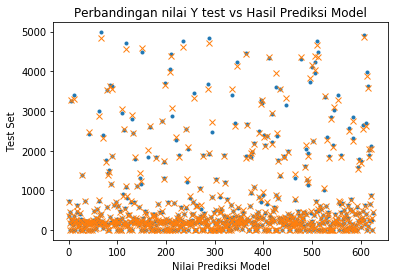

In [40]:
#Visualisasi perbandingan dataset Test dengan hasil prediksi
plt.title('Perbandingan nilai Y test vs Hasil Prediksi Model')
plt.ylabel('Test Set')
plt.xlabel('Nilai Prediksi Model')
plt.plot(y_prediksi, '.', y_test, 'x')
plt.show()


# --- Build Model --- Regresi Linear Berganda

Dari hasil heatmap korelasi yang dilakukan sebelumnya, ditunjukkan bahwa atribut Pembukaan sangat dipengaruhi oleh 3 atribut lainnya yaitu (Tertinggi, Terendah, Terakhir). Karena korelasinya yang saling kuat satu sama lain maka dapat diterapakan teknik Regresi Linear Berganda untuk membangun model prediksinya.

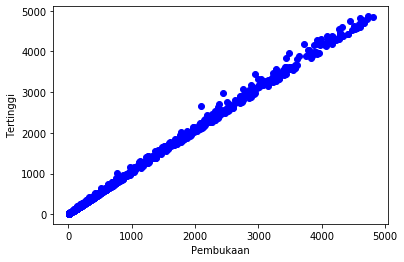

In [41]:
# visualisasi Tertinggi vs Pembukaan

plt.scatter(df['Pembukaan'], df['Tertinggi'],  color='blue')
plt.xlabel("Pembukaan")
plt.ylabel("Tertinggi")
plt.show()

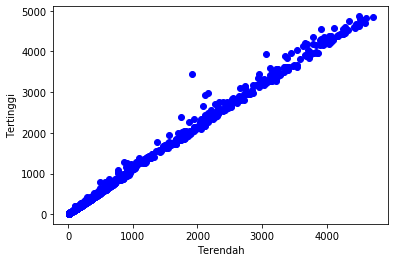

In [42]:
# visualisasi Tertinggi vs Terendah

plt.scatter(df['Terendah'], df['Tertinggi'],  color='blue')
plt.xlabel("Terendah")
plt.ylabel("Tertinggi")
plt.show()

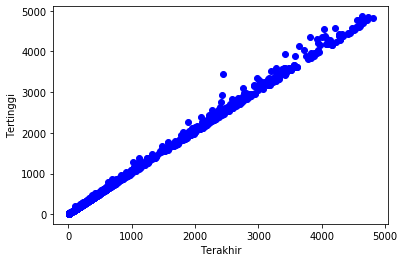

In [43]:
# visualisasi Terakhir vs Tertinggi

plt.scatter(df['Terakhir'], df['Tertinggi'],  color='blue')
plt.xlabel("Terakhir")
plt.ylabel("Tertinggi")
plt.show()

In [44]:
# seleksi data dan menampilkan 10 baris

cdf = df[['Tertinggi','Terendah','Terakhir','Pembukaan']]
cdf.head(10)

,Tertinggi,Terendah,Terakhir,Pembukaan
0,4629.75,4454.79,4569.60,4583.28
1,4778.14,4525.33,4583.28,4628.72
2,4749.12,4349.21,4628.90,4443.22
3,4456.82,4280.18,4443.22,4296.98
4,4297.63,3980.24,4296.98,4095.16
5,4183.02,4029.06,4094.80,4037.06
6,4548.10,3917.43,4034.53,4520.30
7,4549.74,4248.90,4520.30,4270.73
8,4372.83,4172.19,4273.54,4340.23
9,4384.75,4064.17,4340.23,4086.73


### <p style="font-family:ARIAL;color:#1C2842;font-size:100%;" >Distribusi Data Training</p>

In [45]:
## membuat dataset train dan test

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

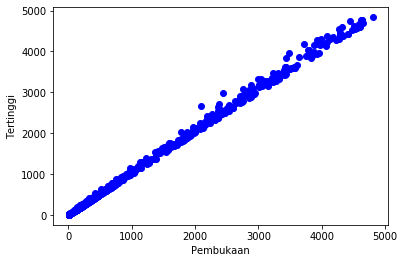

In [46]:
# visualisasi data train Tertinggi size vs Pembukaan

plt.scatter(train['Pembukaan'], train['Tertinggi'],  color='blue')
plt.xlabel("Pembukaan")
plt.ylabel("Tertinggi")
plt.show()

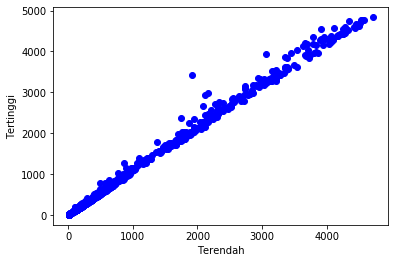

In [47]:
# visualisasi data train Terendah size vs Tertinggi

plt.scatter(train['Terendah'], train['Tertinggi'],  color='blue')
plt.xlabel("Terendah")
plt.ylabel("Tertinggi")
plt.show()

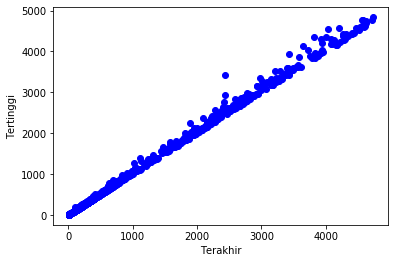

In [48]:
# visualisasi data train Terakhir size vs Tertinggi

plt.scatter(train['Terakhir'], train['Tertinggi'],  color='blue')
plt.xlabel("Terakhir")
plt.ylabel("Tertinggi")
plt.show()

In [49]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Pembukaan','Terendah','Terakhir']])
train_y = np.asanyarray(train[['Tertinggi']])
regr.fit (train_x, train_y)

LinearRegression()

In [50]:
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.72798262 -0.44300727  0.73178011]]
Intercept:  [0.6084494]


Text(0, 0.5, 'Tertinggi')

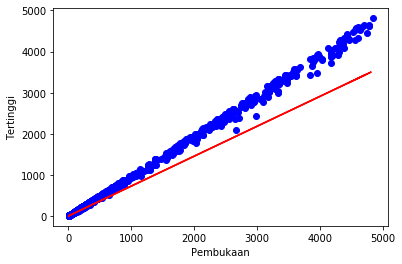

In [51]:
# visualisasi data train Pembukaan vs Tertinggi dengan garis

plt.scatter(train.Tertinggi, train.Pembukaan,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Pembukaan")
plt.ylabel("Tertinggi")

In [52]:
#Perhitungan skor hasil pemodelan
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Pembukaan','Terendah','Terakhir']])
test_y = np.asanyarray(test[['Tertinggi']])
test_y_ = regr.predict(test_x)

mae_lrganda = np.mean(np.absolute(test_y_ - test_y))
mse_lrganda = np.mean((test_y_ - test_y) ** 2)
r2_lrganda  = r2_score(test_y_ , test_y)
print('Hasil perhitungan skor dari model Regresi Linear Berganda :')
print("Mean absolute error: %.2f" % mae_lrganda)
print("Residual sum of squares (MSE): %.2f" % mse_lrganda)
print("R2-score: %.4f" % r2_lrganda)

Hasil perhitungan skor dari model Regresi Linear Berganda :
Mean absolute error: 10.01
Residual sum of squares (MSE): 477.83
R2-score: 0.9996


In [53]:
p1 = pd.DataFrame(test_x, columns =['Pembukaan','Terendah','Terakhir'])
p2 =pd.DataFrame(test_y, columns =['Asli'])
p3 =pd.DataFrame(test_y_, columns =['Prediksi'])
pp = [p1,p2,p3]

hasilprediksiLRGanda = pd.concat(pp, axis=1)


# --- Build Model --- Recurrent Neural Network (RNN)

In [53]:
# Import library untuk membangun model RNN
from keras.layers import Dense, Dropout,SimpleRNN
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [54]:
#Memanggil atribut Tertinggi
hargaTinggi = df['Tertinggi'].values.reshape(-1,1)
hargaTinggi

array([[4629.75],
       [4778.14],
       [4749.12],
       ...,
       [  13.45],
       [  11.95],
       [  11.85]])

In [55]:
#Memanggil atribut Tanggal
Tahun = df['Tanggal'].values.reshape(-1,1)
Tahun

array([['2021-12-02T00:00:00.000000000'],
       ['2021-12-01T00:00:00.000000000'],
       ['2021-11-30T00:00:00.000000000'],
       ...,
       ['2016-03-12T00:00:00.000000000'],
       ['2016-03-11T00:00:00.000000000'],
       ['2016-03-10T00:00:00.000000000']], dtype='datetime64[ns]')

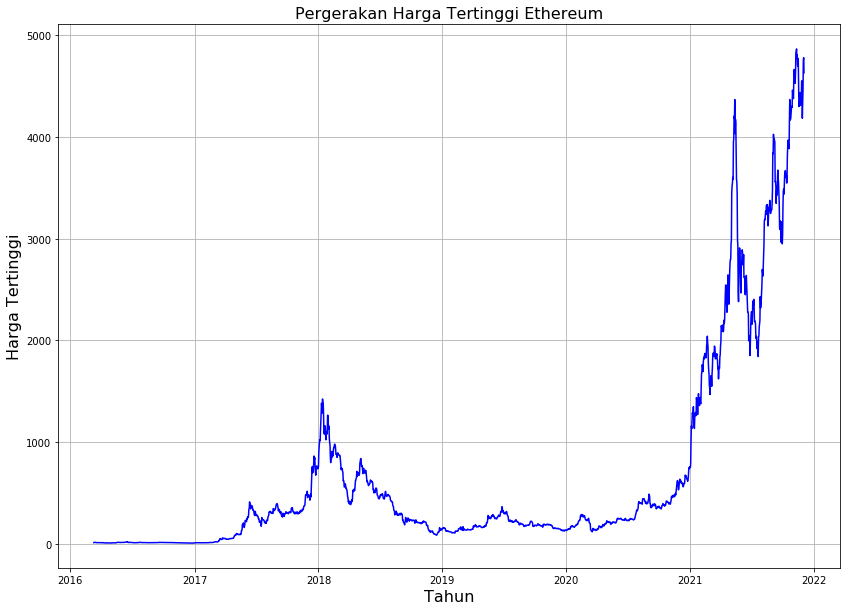

In [56]:
# Visualisasi data harga Teringgi vs Tanggal
plt.figure(figsize=(14,10))                 
plt.plot(Tahun,hargaTinggi, c="blue")
plt.title("Pergerakan Harga Tertinggi Ethereum",fontsize=16)
plt.xlabel("Tahun",fontsize=16)
plt.ylabel("Harga Tertinggi",fontsize=16)
plt.grid()
plt.show()

In [57]:
# Menskalakan data antara 1 dan 0 (scaling) pada low data
scaler = MinMaxScaler(feature_range=(0,1))           
tertinggi_scaled = scaler.fit_transform(hargaTinggi)

In [58]:
# definisikan variabel step dan train 

step_size = 85                     

train_x = []
train_y = []

In [59]:
# membuat fitur dan lists label

for i in range(step_size, 2085):                
    train_x.append(tertinggi_scaled[i-step_size:i,0])
    train_y.append(tertinggi_scaled[i,0])

In [60]:
# mengonversi list yang telah dibuat sebelumnya ke array

train_x = np.array(train_x)                   
train_y = np.array(train_y)

In [61]:
# cek dimensi data dengan function .shape

print(train_x.shape)                               

(2000, 85)


In [62]:
# 498 hari terakhir akan digunakan dalam pengujian
# 2500 hari pertama akan digunakan dalam pelatihan

test_x  = train_x[1600:]            
train_x = train_x[:1600]          
test_y = train_y[1600:]  
train_y = train_y[:1600]

In [63]:
# reshape data untuk dimasukkan kedalam Keras model

train_x = np.reshape(train_x, (1600, step_size, 1))           
test_x = np.reshape(test_x, (400, step_size, 1))

In [64]:
# buat varibel penampung model RNN
rnn_model = Sequential()

In [65]:
# Output dari SimpleRNN akan menjadi bentuk tensor 2D (batch_size, 40) dengan Dropout sebesar 0.15

rnn_model.add(SimpleRNN(40, activation="tanh", return_sequences=True, input_shape=(train_x.shape[1], 1)))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40, activation="tanh", return_sequences=True))
rnn_model.add(Dropout(0.15))

rnn_model.add(SimpleRNN(40, activation="tanh", return_sequences=False))
rnn_model.add(Dropout(0.15))

# Add a Dense layer with 1 units.
rnn_model.add(Dense(1))

In [66]:
# menambahkan loss function kedalam model RNN dengan tipe MSE

rnn_model.compile(optimizer="adam", loss="MSE")

In [67]:
# fit the model RNN, dengan epoch 20 dan batch size 25

rnn_model.fit(X_train, y_train, epochs=20, batch_size=25)

Epoch 1/20
59/59 [==============================] - 2s 2ms/step - loss: 1470827.1250
Epoch 2/20
59/59 [==============================] - 0s 2ms/step - loss: 1464184.6250
Epoch 3/20
59/59 [==============================] - 0s 2ms/step - loss: 1460238.0000
Epoch 4/20
59/59 [==============================] - 0s 2ms/step - loss: 1456841.5000
Epoch 5/20
59/59 [==============================] - 0s 2ms/step - loss: 1453746.8750
Epoch 6/20
59/59 [==============================] - 0s 2ms/step - loss: 1450543.2500
Epoch 7/20
59/59 [==============================] - 0s 2ms/step - loss: 1447673.6250
Epoch 8/20
59/59 [==============================] - 0s 2ms/step - loss: 1444800.3750
Epoch 9/20
59/59 [==============================] - 0s 2ms/step - loss: 1441681.2500
Epoch 10/20
59/59 [==============================] - 0s 2ms/step - loss: 1439021.5000
Epoch 11/20
59/59 [==============================] - 0s 2ms/step - loss: 1436193.7500
Epoch 12/20
59/59 [==============================] - 0s 2ms/ste

In [68]:
# Prediksi Model RNN
rnn_predictions = rnn_model.predict(test_x)

In [69]:
#Melakukan perhitungan skor terhadap model RNN yang dibuat
mae_rnn=metrics.mean_absolute_error(test_y, rnn_predictions) 
mse_rnn=metrics.mean_squared_error(test_y, rnn_predictions) 
r2_rnn = r2_score(test_y, rnn_predictions)

In [70]:
print('Hasil perhitungan skor dari model RNN :')
print('MAE skor = ', mae_rnn)
print('MSE skor = ', mse_rnn)
print('R^2 skor = ', r2_rnn)

Hasil perhitungan skor dari model RNN :
MAE skor =  31.19146300840557
MSE skor =  972.907684397729
R^2 skor =  -181114555.0606114


R^2 skor menunjukkan hasil negatif yang mana berarti model RNN ini sangat tidak cocok untuk digunakan karena garis regresi yang tidak cocok


# --- Build Model --- Long Short Term Memory (LSTM)

In [71]:
# import library for build model 
from keras.layers import LSTM

In [72]:
# buat varibel penampung model LSTM
lstm_model = Sequential()

In [73]:
# Add a LSTM layer with 40 internal units. dengan Dropout sebesar 0.15

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(train_x.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

# Add a Dense layer with 1 units.
lstm_model.add(Dense(1))

In [74]:
# menambahkan loss function kedalam model lstm dengan tipe MSE

lstm_model.compile(optimizer="adam",loss="MSE")

In [75]:
# fit lstm model, dengan epoch 20 dan batch size 25

lstm_model.fit(train_x,train_y,epochs=20,batch_size=25)

Epoch 1/20
64/64 [==============================] - 6s 48ms/step - loss: 0.0065
Epoch 2/20
64/64 [==============================] - 3s 46ms/step - loss: 0.0024
Epoch 3/20
64/64 [==============================] - 3s 46ms/step - loss: 0.0018
Epoch 4/20
64/64 [==============================] - 3s 47ms/step - loss: 0.0016
Epoch 5/20
64/64 [==============================] - 3s 46ms/step - loss: 0.0018
Epoch 6/20
64/64 [==============================] - 3s 46ms/step - loss: 0.0014
Epoch 7/20
64/64 [==============================] - 3s 46ms/step - loss: 0.0015
Epoch 8/20
64/64 [==============================] - 3s 45ms/step - loss: 0.0015
Epoch 9/20
64/64 [==============================] - 3s 46ms/step - loss: 0.0014
Epoch 10/20
64/64 [==============================] - 3s 46ms/step - loss: 9.8797e-04
Epoch 11/20
64/64 [==============================] - 3s 46ms/step - loss: 8.7906e-04
Epoch 12/20
64/64 [==============================] - 3s 47ms/step - loss: 0.0011
Epoch 13/20
64/64 [==========

In [76]:
# Prediksi Model LSTM
lstm_predictions = lstm_model.predict(test_x)

In [77]:
mae_lstm=metrics.mean_absolute_error(test_y,lstm_predictions) 
mse_lstm=metrics.mean_squared_error(test_y,lstm_predictions) 
r2_lstm = r2_score(test_y,lstm_predictions)

In [78]:
print('MAE skor = ', mae_lstm)
print('MSE skor = ', mse_lstm)
print('R^2 skor = ', r2_lstm)

MAE skor =  0.01385033642973287
MSE skor =  0.0001921225446399133
R^2 skor =  -34.76515011620368


R^2 skor menunjukkan hasil negatif yang mana berarti model LSTM ini sangat tidak cocok untuk digunakan karena garis regresi yang tidak cocok

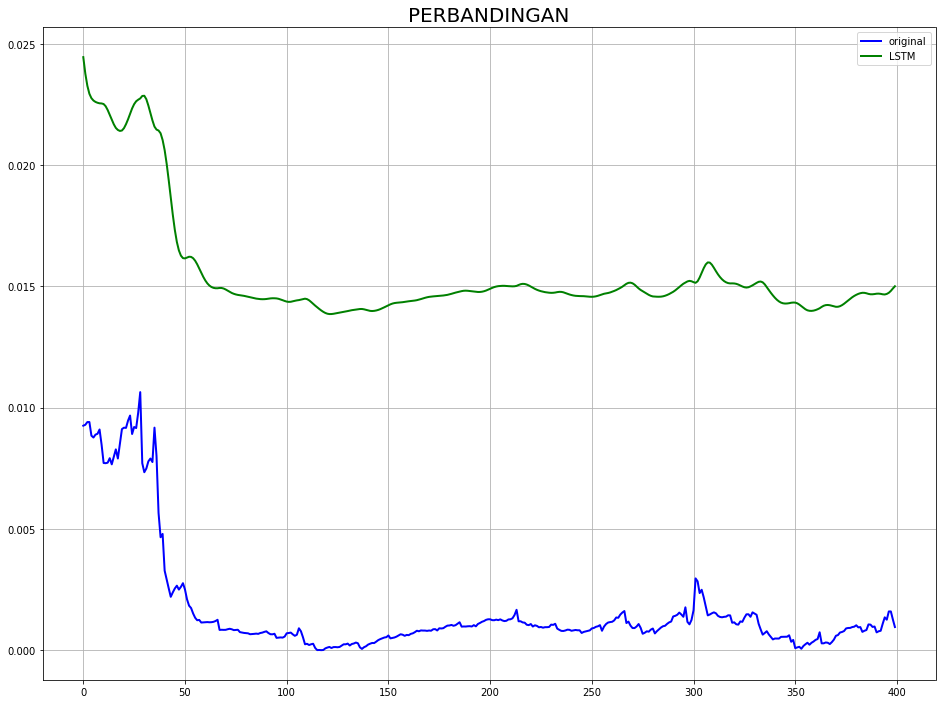

In [79]:
plt.figure(figsize=(16,12))

plt.plot(test_y, c="blue",linewidth=2, label="original")
plt.plot(lstm_predictions, c="green",linewidth=2, label="LSTM")
#plt.plot(rnn_predictions, c="red",linewidth=2, label="RNN")
plt.legend()
plt.title("PERBANDINGAN",fontsize=20)
plt.grid()
plt.show()

Dari visualisasi yang ditunjukkan diatas, dapat diketahui bahwa pergerakan prediksi dengan model LSTM (hijau) tidak bergerak di posisi yang sama dengan data uji (biru). Sehingga memperkuat pernyataan bahwa model ini tidak dapat digunakan untuk prediksi lebih lanjut


# Evaluasi dan Pemilihan Model Terbaik

* Mean Absolute Error (MAE): Rerata dari nilai absolut dari error. MAE adalah metrik paling mudah dipahami karena hanya rata-rata dari error.
* Mean Squared Error (MSE): adalah rerata dari error dikuadratkan. MSE lebih populer dibanding MAE karena fokus pada error yang besar karena dikuadratkan sehingga berdampak lebih besar terhadap error yang lebih besar dibandingkan error yang lebih kecil.
* R-squared bukan error namun metrik yang populer yang merepresentasikan sejauh mana data cocok dengan garis regresi yang didapatkan. Semakin besar R-squared akan semaki baik pencocokan garis terhadap data. Nilai terbaik adalah 1.0 dan dapat bernilai negatif.

In [80]:
results = pd.DataFrame({
    'Model': ['Regresi Linear Sederhana', 
              'Regresi Linear Berganda',
              'RNN',  
              'LSTM'],
    'MSE': [ mse_lrsederhana,
              mse_lrganda,
              mse_rnn,  
              mse_lstm],
    "R^2 Skor":[round(r2_lrsederhana,4),
                round(r2_lrganda,4),
                round(r2_rnn,4),
                round(r2_lstm,4)
                     ]})
result_df = results.sort_values(by='R^2 Skor', ascending=True)
result_df = results.reset_index(drop=True)
result_df.head(9)

,Model,MSE,R^2 Skor
0,Regresi Linear Sederhana,1451.466239,9.987000e-01
1,Regresi Linear Berganda,428.780402,9.995000e-01
2,RNN,972.907684,-1.811146e+08
3,LSTM,0.000192,-3.476520e+01


Sebagaimana yang dapat kita lihat dari perbandingan rate error dan skor R^2 masing-masing model, kita mendapatkan model dengan skor R^2 terbesar pada model Regresi Linear Berganda sebesar 0.9996

In [81]:
print('Hasil prediksi Regresi Linear Berganda : ')
hasilprediksiLRGanda

Hasil prediksi Regresi Linear Berganda : 


,Pembukaan,Terendah,Terakhir,Asli,Prediksi
0,4095.16,3980.24,4296.98,4297.63,4361.230508
1,4270.73,4248.90,4520.30,4549.74,4534.247050
2,4340.23,4172.19,4273.54,4372.83,4440.156630
3,4208.29,4071.01,4290.88,4298.30,4400.133315
4,4612.05,4612.05,4808.38,4822.97,4833.810451
...,...,...,...,...,...
397,10.40,10.40,11.62,11.94,11.979484
398,11.32,10.52,10.67,11.35,11.913334
399,11.09,8.34,10.74,11.20,12.732135
400,15.07,11.40,12.50,15.07,15.578729


In [57]:
#regr.predict([['Pembukaan','Terendah','Terakhir']])
coba_prediksi = regr.predict([[4411.10, 4115.40, 4138.20]])
coba_prediksi

array([[4416.91289715]])

In [64]:
#regr.predict([['Pembukaan','Terendah','Terakhir']])
coba_prediksi = regr.predict([[4295.39, 4250.00, 4411.10]])
coba_prediksi

array([[4472.75204092]])

In [65]:
#regr.predict([['Pembukaan','Terendah','Terakhir']])
coba_prediksi = regr.predict([[4541.10, 4144.60, 4222.00]])
coba_prediksi

array([[4559.93799849]])

In [77]:
#regr.predict([['Pembukaan','Terendah','Terakhir']])
coba_prediksi = regr.predict([[4137.50, 4046.96, 4190.00]])
coba_prediksi

array([[4285.9624798]])

## Menyimpan Model

In [88]:
from keras.models import load_model
import pickle
pickle.dump(regr, open('modellrganda','wb'))

In [90]:
load_model = pickle.load(open('modellrganda','rb'))
load_model.predict([[4411.10, 4115.40, 4138.20]])

array([[4416.91289715]])